In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use('seaborn-v0_8-darkgrid')

In [3]:
#plt.style.available

In [6]:
pd.options.display.min_rows = 20
pd.options.display.max_columns = 50

#### Exploratory Data Analysis 

#### 1. Load the data

In [4]:
df_flights_012022_082022 = pd.read_csv("../../data/eda/flights/flight_data_Y2022/transformed_flight_data_2022.csv.zip",  low_memory=False)

In [5]:
df_flights_012022_082022.shape

(4691967, 46)

In [7]:
df_flights_012022_082022.head()

,FlightDate,Operating_Airline,OriginAirportID,Origin,OriginCityName,OriginState,DestAirportID,Dest,DestCityName,DestState,DestStateName,CRSDepTime,DepTime,DepDelay,DepDelayMinutes,DepDel15,DepartureDelayGroups,DepTimeBlk,TaxiOut,WheelsOff,WheelsOn,TaxiIn,CRSArrTime,ArrTime,ArrDelay,ArrDelayMinutes,ArrDel15,ArrivalDelayGroups,ArrTimeBlk,Cancelled,CancellationCode,Diverted,CRSElapsedTime,ActualElapsedTime,AirTime,Flights,Distance,DistanceGroup,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,FirstDepTime,TotalAddGTime,LongestAddGTime
0,2022-01-06,DL,11697,FLL,"Fort Lauderdale, FL",FL,12953,LGA,"New York, NY",NY,New York,1126,0.0,0.0,0.0,0.0,0.0,1100-1159,0.0,0.0,0.0,0.0,1419,0.0,0.0,0.0,0.0,0.0,1400-1459,True,A,0.0,173.0,0.0,0.0,1.0,1076.0,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2022-01-06,DL,10397,ATL,"Atlanta, GA",GA,11697,FLL,"Fort Lauderdale, FL",FL,Florida,1631,1627.0,-4.0,0.0,0.0,-1.0,1600-1659,15.0,1642.0,1815.0,5.0,1821,1820.0,-1.0,0.0,0.0,-1.0,1800-1859,False,NaN,0.0,110.0,113.0,93.0,1.0,581.0,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2022-01-06,DL,11697,FLL,"Fort Lauderdale, FL",FL,10397,ATL,"Atlanta, GA",GA,Georgia,1931,1929.0,-2.0,0.0,0.0,-1.0,1900-1959,13.0,1942.0,2104.0,10.0,2127,2116.0,-12.0,0.0,0.0,-1.0,2100-2159,False,NaN,0.0,116.0,106.0,83.0,1.0,581.0,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2022-01-06,DL,11697,FLL,"Fort Lauderdale, FL",FL,14492,RDU,"Raleigh/Durham, NC",NC,North Carolina,1024,1019.0,-5.0,0.0,0.0,-1.0,1000-1059,17.0,1036.0,1209.0,3.0,1227,1212.0,-15.0,0.0,0.0,-1.0,1200-1259,False,NaN,0.0,123.0,113.0,93.0,1.0,680.0,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2022-01-06,DL,10397,ATL,"Atlanta, GA",GA,12448,JAN,"Jackson/Vicksburg, MS",MS,Mississippi,1117,1113.0,-4.0,0.0,0.0,-1.0,1100-1159,14.0,1127.0,1127.0,4.0,1142,1131.0,-11.0,0.0,0.0,-1.0,1100-1159,False,NaN,0.0,85.0,78.0,60.0,1.0,341.0,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### 2. Data Preparation
- Identifying missing values
- Renaming columns
- Dropping irrelevant columns and rows
- Feature selection

In [3]:
## clean the data by removing spaces
df_flights= df_flights.rename(columns={'Operating_Airline ' : 'Operating_Airline'})
df_flights["Cancelled"] = df_flights["Cancelled"].astype("bool")

#### Understanding the data
##### Naive Bayesian regression analysis

In [4]:
#### Observe the tails of the flight distribution
##### left tail: 19790 - 19393 = 397
##### right tail: 20436 - 19977 = 459 (long tail)
###### mean = 19822.78
###### median = 19805.0


In [5]:
df_flights.describe().transpose().head(20)

,count,mean,std,min,25%,50%,75%,max
Year,613649.0,2.022000e+03,0.000000,2022.0,2022.0,2022.0,2022.00,2022.0
Quarter,613649.0,3.000000e+00,0.000000,3.0,3.0,3.0,3.00,3.0
Month,613649.0,8.000000e+00,0.000000,8.0,8.0,8.0,8.00,8.0
DayofMonth,613649.0,1.592330e+01,8.946089,1.0,8.0,16.0,24.00,31.0
DayOfWeek,613649.0,3.789419e+00,2.008312,1.0,2.0,4.0,5.00,7.0
DOT_ID_Marketing_Airline,613649.0,1.982278e+04,279.213866,19393.0,19790.0,19805.0,19977.00,20436.0
Flight_Number_Marketing_Airline,613649.0,2.511280e+03,1689.897973,1.0,1118.0,2234.0,3727.00,9678.0
DOT_ID_Originally_Scheduled_Code_Share_Airline,22.0,2.039745e+04,33.651898,20304.0,20378.0,20398.0,20398.00,20452.0
Flight_Num_Originally_Scheduled_Code_Share_Airline,22.0,4.685364e+03,996.653713,3351.0,3936.0,4257.0,5737.25,6032.0
DOT_ID_Operating_Airline,613649.0,1.997030e+04,377.716938,19393.0,19790.0,19930.0,20368.00,20500.0


In [6]:
# Raw data analysis. As is evident, there are some missing values
df_flights.head(10)

,Year,Quarter,Month,DayofMonth,DayOfWeek,FlightDate,Marketing_Airline_Network,Operated_or_Branded_Code_Share_Partners,DOT_ID_Marketing_Airline,IATA_Code_Marketing_Airline,...,Div5Airport,Div5AirportID,Div5AirportSeqID,Div5WheelsOn,Div5TotalGTime,Div5LongestGTime,Div5WheelsOff,Div5TailNum,Duplicate,Unnamed: 119
0,2022,3,8,17,3,2022-08-17,WN,WN,19393,WN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN
1,2022,3,8,17,3,2022-08-17,WN,WN,19393,WN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN
2,2022,3,8,17,3,2022-08-17,WN,WN,19393,WN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN
3,2022,3,8,17,3,2022-08-17,WN,WN,19393,WN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN
4,2022,3,8,17,3,2022-08-17,WN,WN,19393,WN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN
5,2022,3,8,17,3,2022-08-17,WN,WN,19393,WN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN
6,2022,3,8,17,3,2022-08-17,WN,WN,19393,WN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN
7,2022,3,8,17,3,2022-08-17,WN,WN,19393,WN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN
8,2022,3,8,17,3,2022-08-17,WN,WN,19393,WN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN
9,2022,3,8,17,3,2022-08-17,WN,WN,19393,WN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN


In [7]:
df_flights.shape

(613649, 120)

In [8]:
df_flights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 613649 entries, 0 to 613648
Columns: 120 entries, Year to Unnamed: 119
dtypes: bool(1), float64(71), int64(23), object(25)
memory usage: 557.7+ MB


In [9]:
# sns.pairplot(df_flights, diag_kind="kde", hue="Operating_Airline")


In [10]:
df_flights.columns.to_list()

['Year',
 'Quarter',
 'Month',
 'DayofMonth',
 'DayOfWeek',
 'FlightDate',
 'Marketing_Airline_Network',
 'Operated_or_Branded_Code_Share_Partners',
 'DOT_ID_Marketing_Airline',
 'IATA_Code_Marketing_Airline',
 'Flight_Number_Marketing_Airline',
 'Originally_Scheduled_Code_Share_Airline',
 'DOT_ID_Originally_Scheduled_Code_Share_Airline',
 'IATA_Code_Originally_Scheduled_Code_Share_Airline',
 'Flight_Num_Originally_Scheduled_Code_Share_Airline',
 'Operating_Airline',
 'DOT_ID_Operating_Airline',
 'IATA_Code_Operating_Airline',
 'Tail_Number',
 'Flight_Number_Operating_Airline',
 'OriginAirportID',
 'OriginAirportSeqID',
 'OriginCityMarketID',
 'Origin',
 'OriginCityName',
 'OriginState',
 'OriginStateFips',
 'OriginStateName',
 'OriginWac',
 'DestAirportID',
 'DestAirportSeqID',
 'DestCityMarketID',
 'Dest',
 'DestCityName',
 'DestState',
 'DestStateFips',
 'DestStateName',
 'DestWac',
 'CRSDepTime',
 'DepTime',
 'DepDelay',
 'DepDelayMinutes',
 'DepDel15',
 'DepartureDelayGroups',
 'D

#### Delays by Airline in August 2022

In [11]:
airline_csv = "https://raw.githubusercontent.com/jenbam/airlines/master/data-raw/airlines.csv"
airlines = pd.read_csv(airline_csv)
## save locally
#airlines.to_csv("airlines.csv") 
airlines.query("Code == '9E'")
#airlines


,Code,Description
126,9E,Endeavor Air Inc.


In [12]:
airline_counts=df_flights["Operating_Airline"].value_counts()
airline_counts.head()

WN    118889
DL     78673
AA     78327
OO     63713
UA     54918
Name: Operating_Airline, dtype: int64

In [13]:
airline_counts=df_flights["Operating_Airline"].value_counts()
airline_counts
airline_counts.index=airline_counts.index.map(
    airlines.set_index('Code')['Description']
    ).rename("Airline")
airline_counts.head()

Airline
Southwest Airlines Co.    118889
Delta Air Lines Inc.       78673
American Airlines Inc.     78327
SkyWest Airlines Inc.      63713
United Air Lines Inc.      54918
Name: Operating_Airline, dtype: int64

<AxesSubplot: ylabel='Airline'>

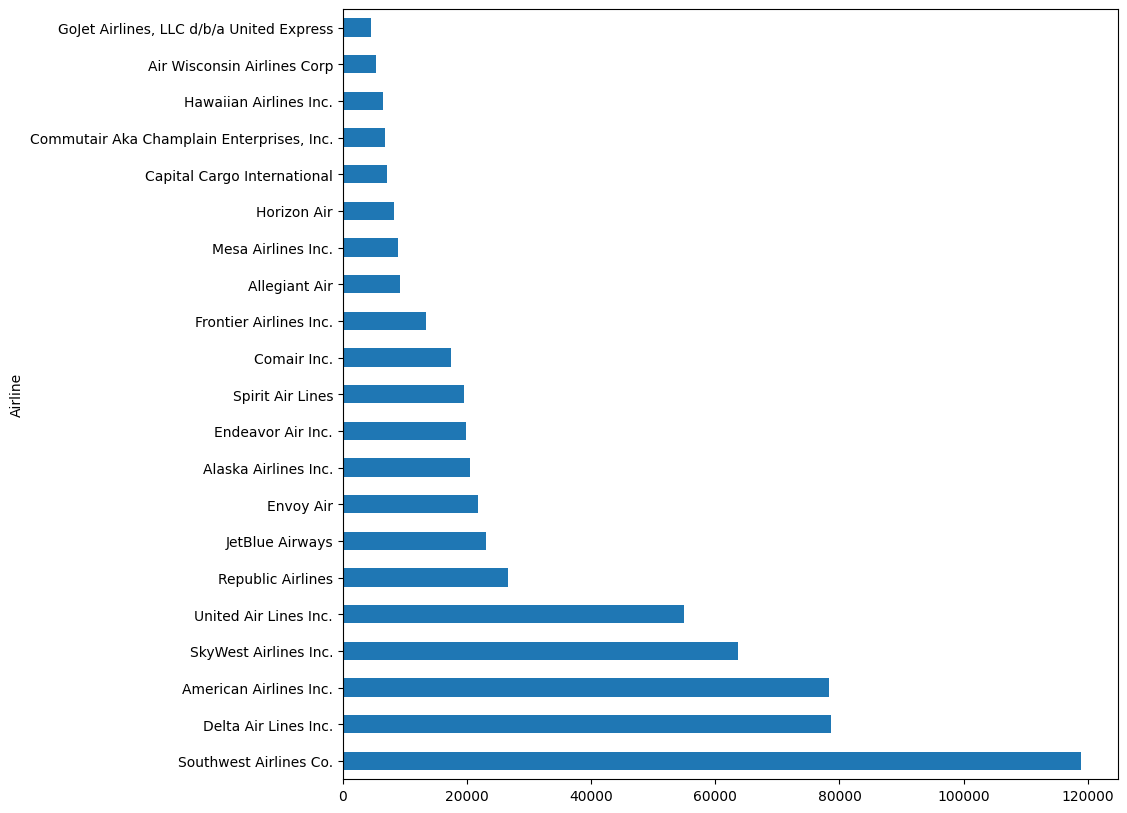

In [14]:
airline_counts.plot(kind='barh', figsize=(10,10))

<AxesSubplot: ylabel='Airline'>

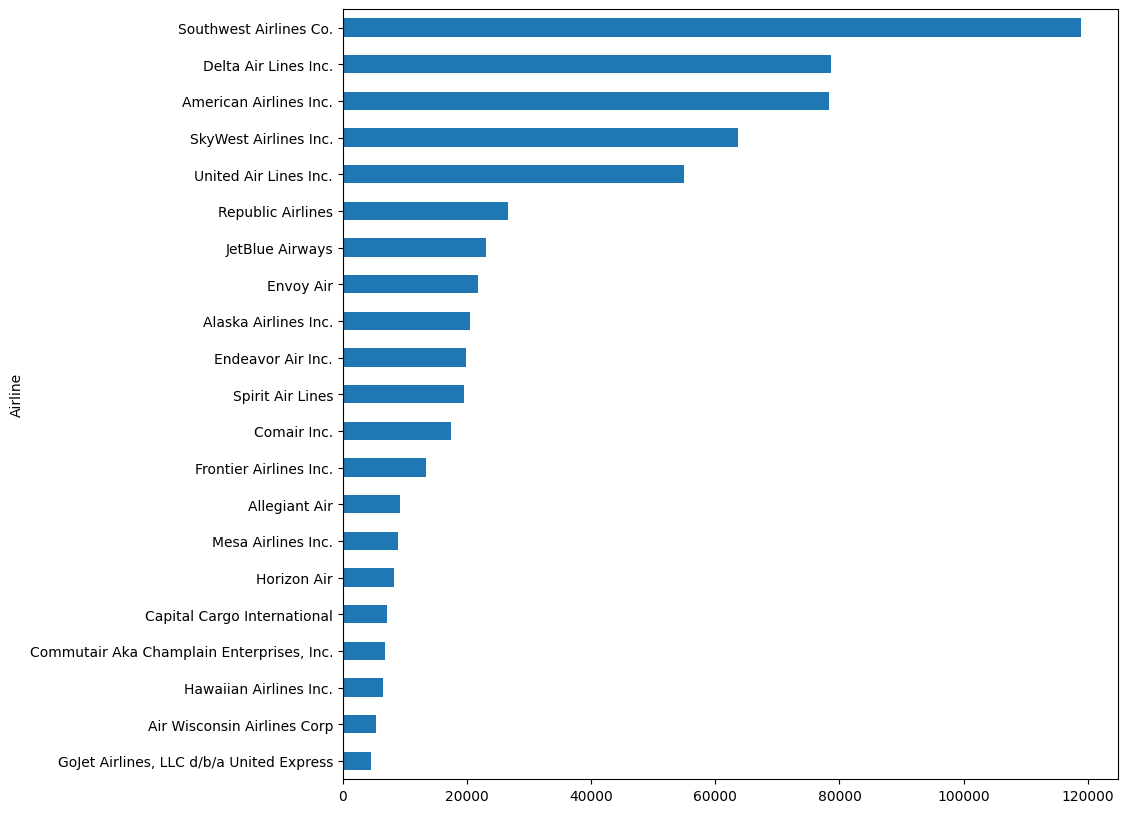

In [15]:
airline_counts.sort_values(ascending=True).plot(kind='barh', figsize=(10,10))

In [16]:
df_flights.query('Year == 2022').head()

,Year,Quarter,Month,DayofMonth,DayOfWeek,FlightDate,Marketing_Airline_Network,Operated_or_Branded_Code_Share_Partners,DOT_ID_Marketing_Airline,IATA_Code_Marketing_Airline,...,Div5Airport,Div5AirportID,Div5AirportSeqID,Div5WheelsOn,Div5TotalGTime,Div5LongestGTime,Div5WheelsOff,Div5TailNum,Duplicate,Unnamed: 119
0,2022,3,8,17,3,2022-08-17,WN,WN,19393,WN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN
1,2022,3,8,17,3,2022-08-17,WN,WN,19393,WN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN
2,2022,3,8,17,3,2022-08-17,WN,WN,19393,WN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN
3,2022,3,8,17,3,2022-08-17,WN,WN,19393,WN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN
4,2022,3,8,17,3,2022-08-17,WN,WN,19393,WN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN


In [17]:
airline_counts.sort_values(ascending=True).to_frame("Row Count")

,Row Count
Airline,
"GoJet Airlines, LLC d/b/a United Express",4517
Air Wisconsin Airlines Corp,5352
Hawaiian Airlines Inc.,6514
"Commutair Aka Champlain Enterprises, Inc.",6831
Capital Cargo International,7139
Horizon Air,8246
Mesa Airlines Inc.,8887
Allegiant Air,9282
Frontier Airlines Inc.,13337


In [18]:
px.bar(
    airline_counts.sort_values(ascending=True), 
    orientation='h', 
    template="plotly_dark",
    title="Flights per airline",
    height=700,
    )

In [19]:
pct_cancelled = df_flights["Cancelled"].mean()
print(f"{pct_cancelled:0.2f}% of flights are cancelled")
pct_cancelled

0.03% of flights are cancelled


0.025231035983110866

In [20]:
df_flights["Cancelled"].value_counts()

False    598166
True      15483
Name: Cancelled, dtype: int64

### Cancelled flights, group by Year

In [21]:
#df_flights.query("Year==2022").query("Cancelled")
df_flights.groupby(["Year"])["Cancelled"].agg("mean").to_frame()

,Cancelled
Year,
2022,0.025231
